**Project Notebook**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score, roc_auc_score,RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, GenericUnivariateSelect, f_classif, chi2
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import time

**Loading data**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/train_task_1_2.csv').sample(100000)
data.head()

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
11142821,8026,95738,14921119,1,3,3
5938454,19269,96922,11471165,1,4,4
14992662,13759,76059,6638933,1,4,4
9434683,6081,81285,18661085,1,3,3
11034072,26893,68491,2538751,0,4,3


**Explore the data**

In [ ]:
data.shape

(100000, 6)

In [ ]:
data.columns

Index(['QuestionId', 'UserId', 'AnswerId', 'IsCorrect', 'CorrectAnswer',
       'AnswerValue'],
      dtype='object')

In [ ]:
dfAnswer = pd.read_csv('/content/drive/MyDrive/answer_metadata_task_1_2.csv')
dfAnswer.head(10)

,AnswerId,DateAnswered,Confidence,GroupId,QuizId,SchemeOfWorkId
0,11808339.0,2020-03-17 07:55:00.000,NaN,4186,14854,NaN
1,98649.0,2018-12-18 14:23:00.000,NaN,9427,16895,28237.0
2,259238.0,2019-02-21 12:41:00.000,NaN,7651,1127,8386.0
3,17027648.0,2020-03-01 18:13:00.000,NaN,8719,5126,40960.0
4,6579101.0,2019-03-22 14:57:00.000,NaN,9020,13445,NaN
5,10647348.0,2020-03-16 08:33:00.000,NaN,3814,14982,8466.0
6,18439419.0,2019-12-16 14:40:00.000,NaN,11482,3493,40959.0
7,2160201.0,2018-10-07 11:24:00.000,NaN,5044,16573,8388.0
8,7340240.0,2020-02-12 09:52:00.000,NaN,393,3687,28228.0
9,11489431.0,2019-09-21 14:48:00.000,NaN,224,7458,8388.0


In [ ]:
dfAnswer.shape

(19834820, 6)

In [ ]:
dfAnswer.columns

Index(['AnswerId', 'DateAnswered', 'Confidence', 'GroupId', 'QuizId',
       'SchemeOfWorkId'],
      dtype='object')

**Check metadata datasets**

In [ ]:
dfStudent = pd.read_csv('/content/drive/MyDrive/student_metadata_task_1_2.csv')
dfStudent.head(10)

,UserId,Gender,DateOfBirth,PremiumPupil
0,58022,2,2006-08-01 00:00:00.000,1.0
1,104674,0,NaN,NaN
2,32020,2,2008-11-01 00:00:00.000,1.0
3,81780,2,2004-07-01 00:00:00.000,NaN
4,99967,0,NaN,NaN
5,82944,2,2005-05-01 00:00:00.000,0.0
6,77439,1,2002-11-01 00:00:00.000,NaN
7,91470,1,2006-10-01 00:00:00.000,NaN
8,13893,2,2006-10-01 00:00:00.000,0.0
9,17714,0,NaN,NaN


In [ ]:
dfStudent.shape

(118971, 4)

In [ ]:
dfStudent.columns

Index(['UserId', 'Gender', 'DateOfBirth', 'PremiumPupil'], dtype='object')

In [ ]:
dfQuestions = pd.read_csv('/content/drive/MyDrive/question_metadata_task_1_2.csv')
dfQuestions.head()

,QuestionId,SubjectId
0,13090,"[3, 32, 71, 77, 141, 185, 186, 214]"
1,1855,"[3, 71, 75, 86, 178]"
2,10423,"[3, 32, 38, 239]"
3,2290,"[3, 32, 33, 144]"
4,12785,"[3, 32, 33, 144]"


In [ ]:
dfQuestions.shape

(27613, 2)

In [ ]:
dfQuestions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27613 entries, 0 to 27612
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   QuestionId  27613 non-null  int64 
 1   SubjectId   27613 non-null  object
dtypes: int64(1), object(1)
memory usage: 431.6+ KB


**Merge Data**

In [ ]:
# Merge train dataset with Answers and Students metadata
dftrain_Answer =data.join(dfAnswer, on='AnswerId', how='left', rsuffix='1').drop('AnswerId1', axis=1)
dftrain_Answer_student = dftrain_Answer.join(dfStudent,on='UserId', how='left', rsuffix='1').drop('UserId1', axis=1)


In [ ]:
# Merge dataset with Questions metadata and get the final dataset
df = dftrain_Answer_student.join(dfQuestions,on='QuestionId', how='left', rsuffix='1').drop('QuestionId1', axis=1)
df.head(10)

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue,DateAnswered,Confidence,GroupId,QuizId,SchemeOfWorkId,Gender,DateOfBirth,PremiumPupil,SubjectId
11142821,8026,95738,14921119,1,3,3,2018-11-13 19:36:00.000,NaN,4698,5203,8418.0,0,NaN,NaN,"[3, 49, 59, 168]"
5938454,19269,96922,11471165,1,4,4,2019-07-04 22:34:00.000,NaN,9473,14751,NaN,0,NaN,NaN,"[3, 32, 46, 334]"
14992662,13759,76059,6638933,1,4,4,2020-01-23 06:30:00.000,NaN,2111,7605,NaN,1,2003-10-01 00:00:00.000,1.0,"[3, 32, 144, 204]"
9434683,6081,81285,18661085,1,3,3,2018-11-30 07:52:00.000,NaN,11782,12467,NaN,2,2004-04-01 00:00:00.000,1.0,"[3, 49, 69, 154]"
11034072,26893,68491,2538751,0,4,3,2019-11-29 11:56:00.000,NaN,10690,15533,NaN,2,2009-12-01 00:00:00.000,0.0,"[3, 49, 65, 154]"
14902608,24479,34261,6990825,1,3,3,2018-11-17 09:14:00.000,NaN,3630,6066,NaN,0,NaN,NaN,"[3, 49, 64, 154]"
14641752,25889,98737,11589545,1,1,1,2020-03-02 10:48:00.000,NaN,388,1919,28237.0,2,NaN,NaN,"[3, 32, 1980]"
3316249,14613,21119,6110841,1,2,2,2019-02-26 10:19:00.000,NaN,6861,12387,NaN,1,2004-02-01 00:00:00.000,NaN,"[3, 32, 144, 203]"
8891769,12276,9703,12940451,1,4,4,2019-11-30 15:14:00.000,75.0,4882,16390,8388.0,0,NaN,NaN,"[3, 32, 42, 211]"
5078871,14257,81849,12705910,1,3,3,2019-02-24 17:28:00.000,NaN,11698,6688,8380.0,2,2004-09-01 00:00:00.000,0.0,"[3, 32, 141, 213]"


**Explore data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 11142821 to 14712046
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   QuestionId      100000 non-null  int64  
 1   UserId          100000 non-null  int64  
 2   AnswerId        100000 non-null  int64  
 3   IsCorrect       100000 non-null  int64  
 4   CorrectAnswer   100000 non-null  int64  
 5   AnswerValue     100000 non-null  int64  
 6   DateAnswered    100000 non-null  object 
 7   Confidence      9456 non-null    float64
 8   GroupId         100000 non-null  int64  
 9   QuizId          100000 non-null  int64  
 10  SchemeOfWorkId  49090 non-null   float64
 11  Gender          100000 non-null  int64  
 12  DateOfBirth     67949 non-null   object 
 13  PremiumPupil    28949 non-null   float64
 14  SubjectId       100000 non-null  object 
dtypes: float64(3), int64(9), object(3)
memory usage: 12.2+ MB


In [ ]:
df.describe()

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue,Confidence,GroupId,QuizId,SchemeOfWorkId,Gender,PremiumPupil
count,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,9456.000000,100000.000000,100000.000000,49090.000000,100000.000000,28949.000000
mean,13827.971960,59495.325310,9.921037e+06,0.644340,2.506510,2.496510,75.039657,5616.828220,8514.253100,17214.144021,1.135850,0.255415
std,7973.706964,34170.141305,5.741623e+06,0.478715,1.105726,1.095783,31.156299,3403.066495,4998.459852,13403.117106,0.765533,0.436102
min,0.000000,0.000000,3.940000e+02,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000
25%,6876.000000,30018.000000,4.933170e+06,0.000000,2.000000,2.000000,50.000000,2580.000000,4083.000000,8386.000000,1.000000,0.000000
50%,13868.000000,59599.500000,9.922386e+06,1.000000,3.000000,3.000000,75.000000,5273.000000,8396.000000,8418.000000,1.000000,0.000000
75%,20736.250000,88991.000000,1.491413e+07,1.000000,3.000000,3.000000,100.000000,8623.000000,12849.000000,28228.000000,2.000000,1.000000
max,27612.000000,118970.000000,1.983471e+07,1.000000,4.000000,4.000000,100.000000,11842.000000,17302.000000,66488.000000,3.000000,1.000000


In [ ]:
df.shape

(100000, 15)

In [ ]:
df.isnull().sum()

QuestionId            0
UserId                0
AnswerId              0
IsCorrect             0
CorrectAnswer         0
AnswerValue           0
DateAnswered          0
Confidence        90544
GroupId               0
QuizId                0
SchemeOfWorkId    50910
Gender                0
DateOfBirth       32051
PremiumPupil      71051
SubjectId             0
dtype: int64

In [ ]:
# Get the percentage of null values in each column
percent_missing = df.isnull().sum() * 100 / len(df)
pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing.round()})

,column_name,percent_missing
QuestionId,QuestionId,0.0
UserId,UserId,0.0
AnswerId,AnswerId,0.0
IsCorrect,IsCorrect,0.0
CorrectAnswer,CorrectAnswer,0.0
AnswerValue,AnswerValue,0.0
DateAnswered,DateAnswered,0.0
Confidence,Confidence,91.0
GroupId,GroupId,0.0
QuizId,QuizId,0.0


There are columns with more than 10% data missing. We will drop those columns.

In [ ]:
dfclean = df.copy()
dfclean.drop(columns=['Confidence','SchemeOfWorkId','PremiumPupil','DateAnswered'], inplace=True)
dfclean.head(10)

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue,GroupId,QuizId,Gender,DateOfBirth,SubjectId
11142821,8026,95738,14921119,1,3,3,4698,5203,0,NaN,"[3, 49, 59, 168]"
5938454,19269,96922,11471165,1,4,4,9473,14751,0,NaN,"[3, 32, 46, 334]"
14992662,13759,76059,6638933,1,4,4,2111,7605,1,2003-10-01 00:00:00.000,"[3, 32, 144, 204]"
9434683,6081,81285,18661085,1,3,3,11782,12467,2,2004-04-01 00:00:00.000,"[3, 49, 69, 154]"
11034072,26893,68491,2538751,0,4,3,10690,15533,2,2009-12-01 00:00:00.000,"[3, 49, 65, 154]"
14902608,24479,34261,6990825,1,3,3,3630,6066,0,NaN,"[3, 49, 64, 154]"
14641752,25889,98737,11589545,1,1,1,388,1919,2,NaN,"[3, 32, 1980]"
3316249,14613,21119,6110841,1,2,2,6861,12387,1,2004-02-01 00:00:00.000,"[3, 32, 144, 203]"
8891769,12276,9703,12940451,1,4,4,4882,16390,0,NaN,"[3, 32, 42, 211]"
5078871,14257,81849,12705910,1,3,3,11698,6688,2,2004-09-01 00:00:00.000,"[3, 32, 141, 213]"


In [ ]:
dfclean=dfclean.dropna(subset=['DateOfBirth'])


In [ ]:
dfclean.isnull().sum()

QuestionId       0
UserId           0
AnswerId         0
IsCorrect        0
CorrectAnswer    0
AnswerValue      0
GroupId          0
QuizId           0
Gender           0
DateOfBirth      0
SubjectId        0
dtype: int64

In [ ]:
dfclean.shape

(67949, 11)

In [ ]:
dfclean.dtypes

QuestionId        int64
UserId            int64
AnswerId          int64
IsCorrect         int64
CorrectAnswer     int64
AnswerValue       int64
GroupId           int64
QuizId            int64
Gender            int64
DateOfBirth      object
SubjectId        object
dtype: object

In [ ]:
from datetime import date
def calculate_age(born):
    today = date.today()
    dob = born.split('-')
    return today.year - int(dob[0]) - ((int(dob[1])) < (int(dob[1])))

In [ ]:
dfclean['age'] = dfclean['DateOfBirth'].apply(calculate_age)
dfclean = dfclean.drop(['DateOfBirth'],axis=1)


In [ ]:
dfclean.head()

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue,GroupId,QuizId,Gender,SubjectId,age
14992662,13759,76059,6638933,1,4,4,2111,7605,1,"[3, 32, 144, 204]",19
9434683,6081,81285,18661085,1,3,3,11782,12467,2,"[3, 49, 69, 154]",18
11034072,26893,68491,2538751,0,4,3,10690,15533,2,"[3, 49, 65, 154]",13
3316249,14613,21119,6110841,1,2,2,6861,12387,1,"[3, 32, 144, 203]",18
5078871,14257,81849,12705910,1,3,3,11698,6688,2,"[3, 32, 141, 213]",18


In [ ]:
dfclean['QuestionId'].unique()

array([13759,  6081, 26893, ..., 22043,  2591, 25246])

In [ ]:
dfclean['UserId'].unique()

array([ 76059,  81285,  68491, ...,  15562,  72955, 112130])

In [ ]:
dfclean['AnswerId'].unique()

array([ 6638933, 18661085,  2538751, ..., 12362834, 11585202, 12482492])

In [ ]:
dfclean['IsCorrect'].unique()

array([1, 0])

In [ ]:
dfclean['CorrectAnswer'].unique()

array([4, 3, 2, 1])

In [ ]:
dfclean['AnswerValue'].unique()

array([4, 3, 2, 1])

In [ ]:
dfclean['GroupId'].unique()

array([ 2111, 11782, 10690, ...,  2228,  9839,  4209])

In [ ]:
dfclean['QuizId'].unique()

array([ 7605, 12467, 15533, ...,  5280,  3782, 17272])

In [ ]:
dfclean['Gender'].unique()

array([1, 2, 0, 3])

In [ ]:
# categorical columns
dfclean['CorrectAnswer'] = dfclean['CorrectAnswer'].astype('category')
dfclean['AnswerValue'] = dfclean['AnswerValue'].astype('category')
dfclean['Gender'] = dfclean['Gender'].astype('category')
dfclean['SubjectId'] = dfclean['SubjectId'].astype('category')

dfclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67949 entries, 14992662 to 767294
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   QuestionId     67949 non-null  int64   
 1   UserId         67949 non-null  int64   
 2   AnswerId       67949 non-null  int64   
 3   IsCorrect      67949 non-null  int64   
 4   CorrectAnswer  67949 non-null  category
 5   AnswerValue    67949 non-null  category
 6   GroupId        67949 non-null  int64   
 7   QuizId         67949 non-null  int64   
 8   Gender         67949 non-null  category
 9   SubjectId      67949 non-null  category
 10  age            67949 non-null  int64   
dtypes: category(4), int64(7)
memory usage: 4.5 MB


**Data Visualization**

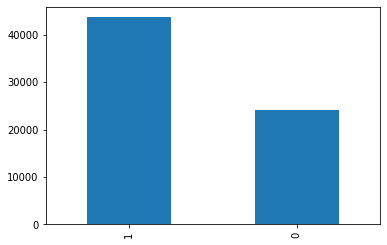

In [ ]:
dfclean['IsCorrect'].value_counts().plot(kind='bar')

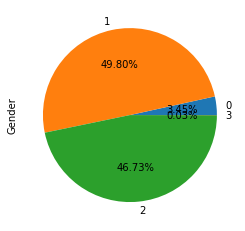

In [ ]:
dfclean.groupby('Gender').size().plot(kind='pie',ylabel='Gender', autopct='%.2f%%')

There are 49.75% students with Gender type 1 followed by type 2.

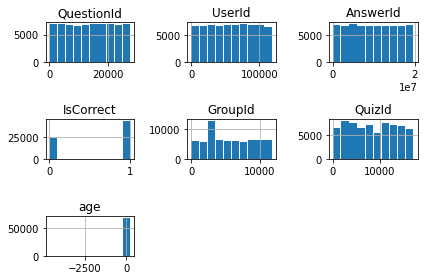

In [ ]:
dfclean.hist(rwidth = 0.9)
plt.tight_layout()

In [ ]:
zero_values = (df==0).sum()
zero_values_df = pd.DataFrame(zero_values).reset_index()
zero_values_df.columns=['feature', 'zero_values']
zero_values_df.head(10)

,feature,zero_values
0,QuestionId,3
1,UserId,1
2,AnswerId,0
3,IsCorrect,35566
4,CorrectAnswer,0
5,AnswerValue,0
6,DateAnswered,0
7,Confidence,730
8,GroupId,4
9,QuizId,3


There are some Zeros in columns. We cab check the percentage of zeros in these columns.

In [ ]:
zero_values2_df = zero_values_df[zero_values_df.zero_values>0]
zero_values2_df['percentage'] = (zero_values2_df['zero_values']/
                                 df.shape[0]*100).round(2)
zero_values2_df.sort_values('percentage')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,feature,zero_values,percentage
0,QuestionId,3,0.00
1,UserId,1,0.00
8,GroupId,4,0.00
9,QuizId,3,0.00
7,Confidence,730,0.73
13,PremiumPupil,21555,21.56
11,Gender,23414,23.41
3,IsCorrect,35566,35.57


So as per results there are zero percent zeros in all the columns except IsCorrect and gender column. The zeros in IsCorrect and gender column are the genuin categorical value. So there is no need to handle zeros.

In [ ]:
# Label encoding

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dfclean['Gender']=le.fit_transform(dfclean['Gender'])
dfclean['CorrectAnswer']=le.fit_transform(dfclean['CorrectAnswer'])
dfclean['AnswerValue']=le.fit_transform(dfclean['AnswerValue'])
dfclean['SubjectId']=le.fit_transform(dfclean['SubjectId'])

dfclean.head()

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue,GroupId,QuizId,Gender,SubjectId,age
14992662,13759,76059,6638933,1,3,3,2111,7605,1,159,19
9434683,6081,81285,18661085,1,2,2,11782,12467,2,752,18
11034072,26893,68491,2538751,0,3,2,10690,15533,2,742,13
3316249,14613,21119,6110841,1,1,1,6861,12387,1,156,18
5078871,14257,81849,12705910,1,2,2,11698,6688,2,126,18


In [ ]:
dfclean.columns

Index(['QuestionId', 'UserId', 'AnswerId', 'IsCorrect', 'CorrectAnswer',
       'AnswerValue', 'GroupId', 'QuizId', 'Gender', 'SubjectId', 'age'],
      dtype='object')

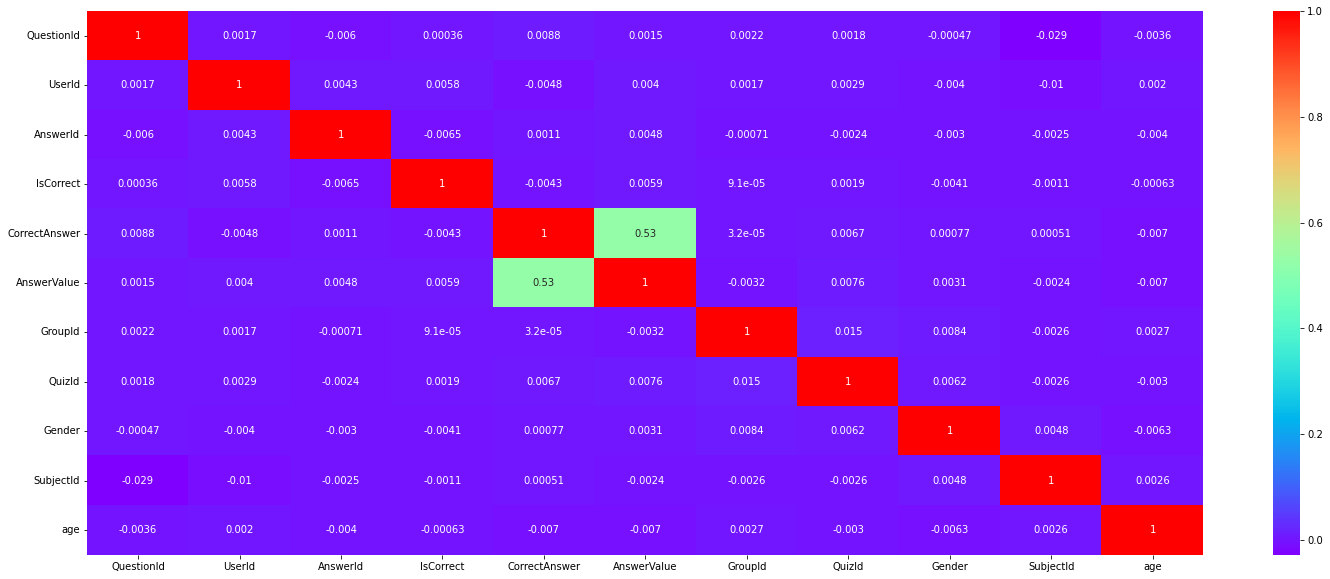

In [ ]:
plt.figure(figsize=(25,10))
sns.heatmap(dfclean.corr(),annot=True,cmap='rainbow')

In [ ]:
# Normalize the data 
from sklearn.preprocessing import StandardScaler
scalar_ = StandardScaler()

dfclean['QuestionId'] = scalar_.fit_transform(dfclean[['QuestionId']])
dfclean['AnswerId'] = scalar_.fit_transform(dfclean[['AnswerId']])
dfclean['UserId'] = scalar_.fit_transform(dfclean[['UserId']])

In [ ]:
def SaveResults(modelname, accuracy, precision, recall, F1_score, confusion_matrix, roc, perfcounter ):
  global dfResults
  dfResults.style.hide_index()
  if(dfResults[dfResults['Model']==modelname] is not np.empty):
    dfResults.drop(dfResults.loc[dfResults['Model']==modelname].index, inplace=True)
  new_results = {'Model': modelname, 
             'Accuracy': accuracy, 
             'Precision':precision, 
             'Recall':recall, 
             'F1 score':F1_score, 
             'Confusion matrix':confusion_matrix, 
             'ROC':roc,
             'Perf counter': perfcounter }
  #append row to the dataframe
  dfResults= dfResults.append(new_results, ignore_index=True)

def PrintResults(modelname):
  index = dfResults[dfResults['Model']== modelname].index
  print("Accuracy : ", dfResults.iloc[index,1].to_string(index=False))
  print("Precision: ", dfResults.iloc[index,2].to_string(index=False))
  print("Recall: ", dfResults.iloc[index,3].to_string(index=False))
  print("F1 score: ", dfResults.iloc[index,4].to_string(index=False))
  print("Confusion matrix:", dfResults.iloc[index,5].to_string(index=False))
  print("ROC AUC Score: ", dfResults.iloc[index,6].to_string(index=False))
  print("Perf counter: ", dfResults.iloc[index,7].to_string(index=False))

def model(classifier, modelname):
  start = time.perf_counter()
  classifier.fit(x_train,y_train)
  y_predict = classifier.predict(x_test)
  end = time.perf_counter()
  cm = confusion_matrix(y_test, y_predict)
  precision = precision_score(y_test, y_predict)
  recall = recall_score(y_test, y_predict)
  accuracy= accuracy_score(y_test, y_predict)
  f1Score = f1_score(y_test, y_predict)
  RocAucScore = roc_auc_score(y_test, classifier.predict_proba(x_test)[:, 1])
  perfcounter = end - start
  SaveResults(modelname, accuracy, precision, recall, f1Score, cm, RocAucScore, perfcounter )
  PrintResults(modelname)

  RocCurveDisplay.from_estimator(classifier, x_test,y_test)
  plt.title('ROC_AUC_PLOT')
  plt.show()

**Task 1: predict the correctness of answer chosen by a student**

In [ ]:
#features and target 
x= dfclean.drop(['IsCorrect'], axis=1)
y= dfclean['IsCorrect']

In [ ]:
dfResults = pd.DataFrame(columns=['Model','Accuracy', 'Precision','Recall','F1 score','Confusion matrix','ROC', 'Perf counter'])
dfResults

,Model,Accuracy,Precision,Recall,F1 score,Confusion matrix,ROC,Perf counter


**Implement SelectPercentile**

In [ ]:
selectorP = SelectPercentile(score_func=f_classif, percentile=30)
x_p = selectorP.fit_transform(x, y)

In [ ]:
# display the selected columns of percentile=20
cols = selectorP.get_support(indices=True)
selectedPCols = x.columns[cols].to_list()
print(selectedPCols)

['QuestionId', 'UserId', 'CorrectAnswer']


**Splitting the data**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_p,y,test_size=0.2,random_state=41, 
                                              stratify=y)

**Build SVM with kernel= 'rbf', gamma= 1.0**

Accuracy :  0.642653
Precision:  0.642653
Recall:  1.0
F1 score:  0.782457
Confusion matrix: [[0, 4871], [0, 8760]]
ROC AUC Score:  0.496782
Perf counter:  953.916


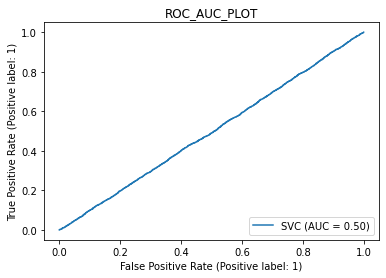

In [ ]:
# Build and evaluate the model
SVC_with_rbf = SVC(kernel= 'rbf', gamma= 1.0, probability=True)
model(SVC_with_rbf,'SVC_with_rbf')

**Build SVM with kernel= 'poly'**

Accuracy :  0.642653
Precision:  0.642653
Recall:  1.0
F1 score:  0.782457
Confusion matrix: [[0, 4871], [0, 8760]]
ROC AUC Score:  0.498175
Perf counter:  450.671853


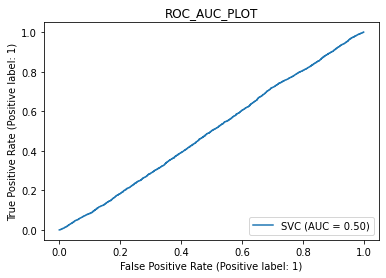

In [ ]:
# Build and evaluate the model
SVC_with_poly = SVC(kernel= 'poly', probability=True)
model(SVC_with_poly,'SVC_with_poly')

**Build and evaluate SVM with kernel= 'linear'**

Accuracy :  0.642653
Precision:  0.642653
Recall:  1.0
F1 score:  0.782457
Confusion matrix: [[0, 4871], [0, 8760]]
ROC AUC Score:  0.505876
Perf counter:  350.336138


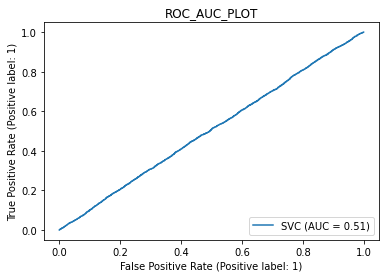

In [ ]:
# Build and evaluate the model
from sklearn.svm import SVC
SVC_with_linear_kernel = SVC(kernel= 'linear', probability=True)
model(SVC_with_linear_kernel,'SVC_with_linear_kernel')

**Build and evaluate Naive Bayes classifier**

Accuracy :  0.642653
Precision:  0.642653
Recall:  1.0
F1 score:  0.782457
Confusion matrix: [[0, 4871], [0, 8760]]
ROC AUC Score:  0.512481
Perf counter:  0.016979


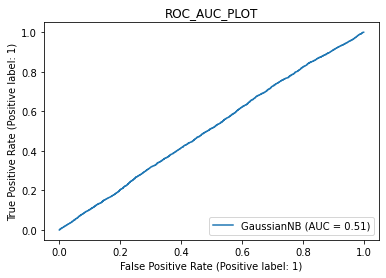

In [ ]:
# Build and evaluate the model
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
model(clf,'GaussianNaiveBayes')

**Implement SelectKBest**

In [ ]:
selectorK = SelectKBest(score_func=f_classif, k=5)
x_k = selectorK.fit_transform(x,y)

In [ ]:
# display the selected columns
cols = selectorK.get_support(indices=True)
selectedKCols = x.columns[cols].to_list()
print(selectedKCols)

['QuestionId', 'UserId', 'CorrectAnswer', 'SubjectId', 'age']


**Splitting the data**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_k,y,test_size=0.2,random_state=41, 
                                              stratify=y)

**Build and evaluate Logistic Regression**

Accuracy :  0.642726
Precision:  0.6427
Recall:  1.0
F1 score:  0.782492
Confusion matrix: [[1, 4870], [0, 8760]]
ROC AUC Score:  0.510815
Perf counter:  0.667368


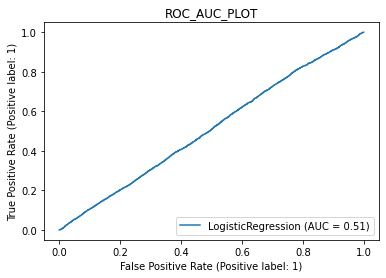

In [ ]:
# Build and evaluate the model
LogisticRegression = LogisticRegression()
model(LogisticRegression,'LogisticRegression')

**Decision tree (3 different trees with different hyperparameters)**

**Splitting the data**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41, 
                                              stratify=y)

**1 Decision tree with criterion="entropy"**

Accuracy :  0.920842
Precision:  0.938363
Recall:  0.93847
F1 score:  0.938417
Confusion matrix: [[4331, 540], [539, 8221]]
ROC AUC Score:  0.913805
Perf counter:  0.864787


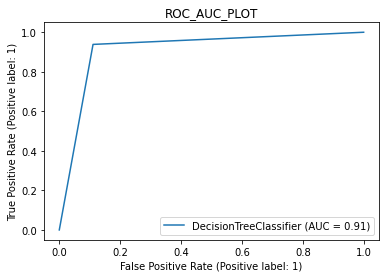

In [ ]:
# Build and evaluate the model
DecisionTreeClassifier_with_entropy = DecisionTreeClassifier(criterion="entropy")
model(DecisionTreeClassifier_with_entropy,'DecisionTreeClassifier_with_entropy')

**2 Decision tree with criterion="gini" and splitter = "random"**

Accuracy :  1.0
Precision:  1.0
Recall:  1.0
F1 score:  1.0
Confusion matrix: [[4871, 0], [0, 8760]]
ROC AUC Score:  1.0
Perf counter:  0.047348


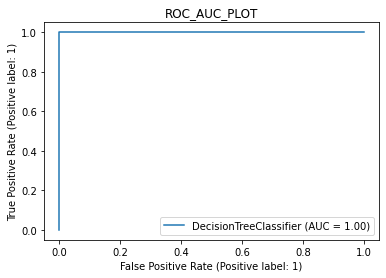

In [ ]:
# Build and evaluate the model
DecisionTreeClassifier_with_gini_randomsplitter = DecisionTreeClassifier(criterion="gini", splitter="random")
model(DecisionTreeClassifier_with_gini_randomsplitter,'DecisionTreeClassifier_with_gini_randomsplitter')

**3 Decision tree with criterion="gini" and splitter = "best"**

Accuracy :  0.835302
Precision:  0.876111
Recall:  0.86621
F1 score:  0.871133
Confusion matrix: [[3798, 1073], [1172, 7588]]
ROC AUC Score:  0.822963
Perf counter:  0.901704


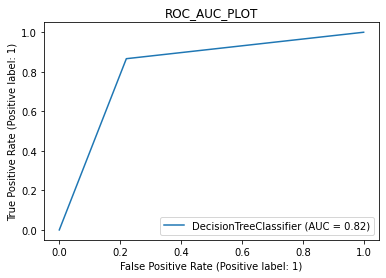

In [ ]:
# Build and evaluate the model
DecisionTreeClassifier_with_gini_bestsplitter = DecisionTreeClassifier(criterion="gini", splitter="best")
model(DecisionTreeClassifier_with_gini_bestsplitter,'DecisionTreeClassifier_with_gini_bestsplitter')

**Random Forest (use Grid search to find best parameters:)**
1. For the criterion (Gini or entropy)
2. Max feature
3. Max depth
4. Number of trees

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41, 
                                              stratify=y)

In [ ]:
parameters ={'max_depth': [10, 20, 30, 40, 50],
     'criterion' : ['gini'],
     'max_features': [0.5,0.7],
     'n_estimators': [50,100]}


# Create a based model
RandomForestClassifierWithParams = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RandomForestClassifierWithParams, param_grid = parameters, 
                          cv = 5, n_jobs = -1, scoring='accuracy')


In [ ]:
#  Get param size
from sklearn.model_selection import ParameterGrid
param_size = ParameterGrid(parameters)
len(param_size)

20

Best Params:  {'criterion': 'gini', 'max_depth': 50, 'max_features': 0.5, 'n_estimators': 50}
Best Score:  0.9340267897600265
Accuracy :  0.968308
Precision:  0.953003
Recall:  1.0
F1 score:  0.975936
Confusion matrix: [[4439, 432], [0, 8760]]
ROC AUC Score:  0.999906
Perf counter:  18.270244


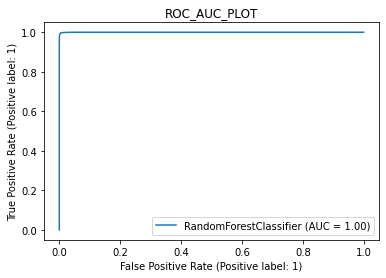

In [ ]:
# Fit the grid search to the data
start = time.perf_counter()
grid_result= grid_search.fit(x_train, y_train)
print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)

y_predict = grid_search.predict(x_test)
end = time.perf_counter()
cm = confusion_matrix(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
accuracy= accuracy_score(y_test, y_predict)
f1Score = f1_score(y_test, y_predict)
RocAucScore = roc_auc_score(y_test, grid_search.predict_proba(x_test)[:, 1])
perfcounter = end - start
SaveResults('RandomForestClassifierWithParams', accuracy, precision, recall, f1Score, cm, RocAucScore, perfcounter )
PrintResults('RandomForestClassifierWithParams')

RocCurveDisplay.from_estimator(grid_search, x_test,y_test)
plt.title('ROC_AUC_PLOT')
plt.show()


**Gradient Boosting Classifier (GridSearchCV for Hyperparameter Tuning)**

Best Params:  {'max_depth': 9, 'min_samples_split': 200}
Accuracy :  1.0
Precision:  1.0
Recall:  1.0
F1 score:  1.0
Confusion matrix: [[4871, 0], [0, 8760]]
ROC AUC Score:  1.0
Perf counter:  776.446885


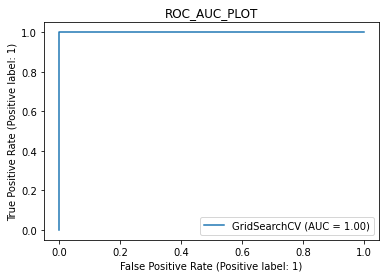

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
params = {'max_depth':range(5,16,2), 
          'min_samples_split':range(200,1001,200)}

GradientBoostingClassifier_GridSearchCV = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, 
                                                                                              n_estimators=60, 
                                                                                              max_features='sqrt', 
                                                                                              subsample=0.8, 
                                                                                              random_state=10), 
param_grid = params, scoring='accuracy',n_jobs=4, cv=5)
start = time.perf_counter()
grid_result = GradientBoostingClassifier_GridSearchCV.fit(x_train, y_train)
print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)

y_predict = grid_search.predict(x_test)
end = time.perf_counter()
cm = confusion_matrix(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
accuracy= accuracy_score(y_test, y_predict)
f1Score = f1_score(y_test, y_predict)
RocAucScore = roc_auc_score(y_test, grid_search.predict_proba(x_test)[:, 1])
perfcounter = end - start
SaveResults('GradientBoostingClassifier_GridSearchCV', accuracy, precision, recall, f1Score, cm, RocAucScore, perfcounter )
PrintResults('GradientBoostingClassifier_GridSearchCV')

RocCurveDisplay.from_estimator(grid_search, x_test,y_test)
plt.title('ROC_AUC_PLOT')
plt.show()

**Bagging Classifier with decision trees**

Accuracy :  0.942557
Precision:  0.918038
Recall:  0.999886
F1 score:  0.957215
Confusion matrix: [[4089, 782], [1, 8759]]
ROC AUC Score:  0.999853
Perf counter:  296.784772


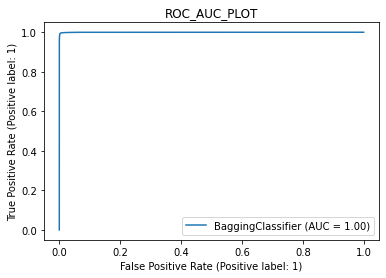

In [ ]:
# initialize the base classifier
base_cls = DecisionTreeClassifier()
num_trees = 500

# bagging classifier
Bagging_DecisionTreeClassifier = BaggingClassifier(base_estimator = base_cls,
                          n_estimators = num_trees,
                          random_state = 0)
model(Bagging_DecisionTreeClassifier,'Bagging_DecisionTreeClassifier')

**Bagging Classifier with Naïve bayes**

Accuracy :  0.641479
Precision:  0.642989
Recall:  0.994064
F1 score:  0.780881
Confusion matrix: [[36, 4835], [52, 8708]]
ROC AUC Score:  0.501475
Perf counter:  15.529298


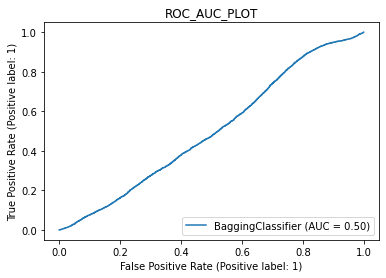

In [ ]:
# initialize the base classifier
base_cls = GaussianNB()
num_trees = 500
seed = 7
  
# bagging classifier
Bagging_Naïve_bayes = BaggingClassifier(base_estimator = base_cls,
                          n_estimators = num_trees,
                          random_state = 7)
model(Bagging_Naïve_bayes,'Bagging_Naïve_bayes')

**AdaBoost Classifier**

results:  [0.64250605 0.64265278 0.64265278 0.64255319 0.64247982]
Mean:  0.642568924261102
Accuracy :  0.642579
Precision:  0.642627
Recall:  0.999886
F1 score:  0.782403
Confusion matrix: [[0, 4871], [1, 8759]]
ROC AUC Score:  0.507751
Perf counter:  2.146856


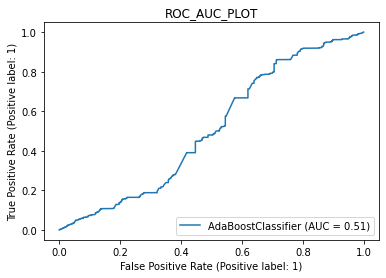

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

seed = 7

num_trees = 30

AdaBoostClassifier = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
result = model_selection.cross_val_score(AdaBoostClassifier, x, y)
print("results: ",result)
print("Mean: ",result.mean())

model(AdaBoostClassifier,'AdaBoostClassifier')


**Use Ensembling method to improve the results**

Best Params:  {'lr__C': 1.0, 'rf__n_estimators': 200}
Accuracy :  0.810579
Precision:  0.772591
Recall:  0.999429
F1 score:  0.871491
Confusion matrix: [[2294, 2577], [5, 8755]]
ROC AUC Score:  0.998046
Perf counter:  361.723549


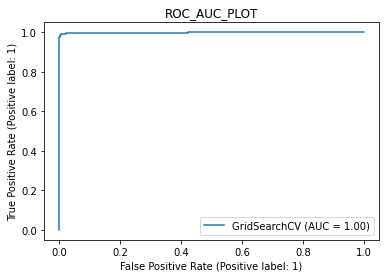

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')

params = {'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200]}
grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
start = time.perf_counter()
grid = grid.fit(x_train, y_train)
print('Best Params: ', grid.best_params_)
print('Best Score: ', grid.best_score_)

y_predict = grid.predict(x_test)
end = time.perf_counter()
cm = confusion_matrix(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
accuracy= accuracy_score(y_test, y_predict)
f1Score = f1_score(y_test, y_predict)
RocAucScore = roc_auc_score(y_test, grid.predict_proba(x_test)[:, 1])
perfcounter = end - start
SaveResults('Ensembling_VotingClassifier_GridSearchCV', accuracy, precision, recall, f1Score, cm, RocAucScore, perfcounter )
PrintResults('Ensembling_VotingClassifier_GridSearchCV')

RocCurveDisplay.from_estimator(grid, x_test,y_test)
plt.title('ROC_AUC_PLOT')
plt.show()

**Compare the classifiers**

In [ ]:
# Display the model execution results
dfResults

,Model,Accuracy,Precision,Recall,F1 score,Confusion matrix,ROC,Perf counter
0,SVC_with_rbf,0.642653,0.642653,1.000000,0.782457,"[[0, 4871], [0, 8760]]",0.496782,953.916000
1,SVC_with_poly,0.642653,0.642653,1.000000,0.782457,"[[0, 4871], [0, 8760]]",0.498175,450.671853
2,SVC_with_linear_kernel,0.642653,0.642653,1.000000,0.782457,"[[0, 4871], [0, 8760]]",0.505876,350.336138
3,GaussianNaiveBayes,0.642653,0.642653,1.000000,0.782457,"[[0, 4871], [0, 8760]]",0.512481,0.016979
4,LogisticRegression,0.642726,0.642700,1.000000,0.782492,"[[1, 4870], [0, 8760]]",0.510815,0.667368
5,DecisionTreeClassifier_with_entropy,0.920842,0.938363,0.938470,0.938417,"[[4331, 540], [539, 8221]]",0.913805,0.864787
6,DecisionTreeClassifier_with_gini_randomsplitter,1.000000,1.000000,1.000000,1.000000,"[[4871, 0], [0, 8760]]",1.000000,0.047348
7,DecisionTreeClassifier_with_gini_bestsplitter,0.835302,0.876111,0.866210,0.871133,"[[3798, 1073], [1172, 7588]]",0.822963,0.901704
8,RandomForestClassifierWithParams,0.968308,0.953003,1.000000,0.975936,"[[4439, 432], [0, 8760]]",0.999906,18.270244
9,GradientBoostingClassifier_GridSearchCV,1.000000,1.000000,1.000000,1.000000,"[[4871, 0], [0, 8760]]",1.000000,776.446885


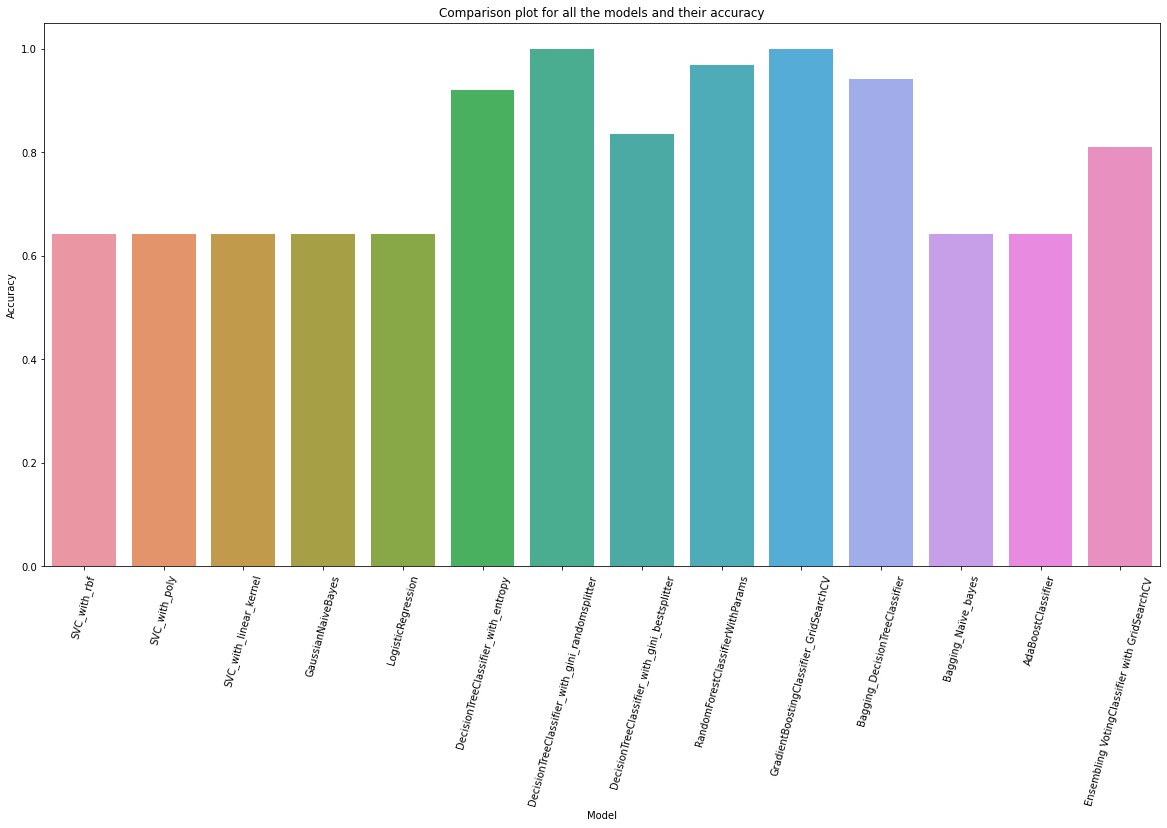

In [ ]:
plt.figure(figsize=(20,10))
ax= sns.barplot(x = dfResults.Model,y = dfResults.Accuracy)

ax.set_xticklabels(dfResults.Model,rotation = 75)
ax.set_title('Comparison plot for all the models and their accuracy')
plt.show()

From the above results we can see that DecisionTreeClassifier_with_gini_randomsplitter performed the best with accuracy 1 and execution time 0.047 seconds. We can use this model to predict the correctness of the answer selected by a student.

**Save the best Model with pickle**

In [ ]:
import pickle
filename='IsCorrect.sav'
pickle.dump(DecisionTreeClassifier_with_gini_randomsplitter, open(filename, 'wb'))

**Load the saved mode to predict the sales price.**

In [ ]:
TestData =  np.array([[11278,60776,19520086,1,1,	4528,	13483,	1,	395,	18]])
TestData.reshape(1, -1)

array([[   11278,    60776, 19520086,        1,        1,     4528,
           13483,        1,      395,       18]])

In [ ]:
loaded_model = pickle.load(open("/content/IsCorrect.sav", 'rb'))

y_predicted = loaded_model.predict(TestData)

print(y_predicted)

[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


The predicted result is 1 which means that the answer given by student us correct.

**Task 2: Predict the answer chosen by a student**

In [ ]:
#features and target
dfcleanTask2 = dfclean.copy()
x= dfcleanTask2.drop(['AnswerValue'], axis=1)
y= dfcleanTask2['AnswerValue']

In [ ]:
dfResults = pd.DataFrame(columns=['Model','Accuracy', 'Precision','Recall','F1 score','Confusion matrix','ROC', 'Perf counter'])
dfResults

,Model,Accuracy,Precision,Recall,F1 score,Confusion matrix,ROC,Perf counter


In [ ]:
def SaveResultsTask2(modelname, accuracy, precision, recall, F1_score, confusion_matrix, roc, perfcounter ):
  global dfResults
  dfResults.style.hide_index()
  if(dfResults[dfResults['Model']==modelname] is not np.empty):
    dfResults.drop(dfResults.loc[dfResults['Model']==modelname].index, inplace=True)
  new_results = {'Model': modelname, 
             'Accuracy': accuracy, 
             'Precision':precision, 
             'Recall':recall, 
             'F1 score':F1_score, 
             'Confusion matrix':confusion_matrix, 
             'ROC':roc,
             'Perf counter': perfcounter }
  #append row to the dataframe
  dfResults= dfResults.append(new_results, ignore_index=True)

def PrintResultsTask2(modelname):
  index = dfResults[dfResults['Model']== modelname].index
  print("Accuracy : ", dfResults.iloc[index,1].to_string(index=False))
  print("Precision: ", dfResults.iloc[index,2].to_string(index=False))
  print("Recall: ", dfResults.iloc[index,3].to_string(index=False))
  print("F1 score: ", dfResults.iloc[index,4].to_string(index=False))
  print("Confusion matrix:", dfResults.iloc[index,5].to_string(index=False))
  print("ROC AUC Score: ", dfResults.iloc[index,6].to_string(index=False))
  print("Perf counter: ", dfResults.iloc[index,7].to_string(index=False))

def modelTask2(classifier, modelname):
  start = time.perf_counter()
  classifier.fit(x_train,y_train)
  y_predict = classifier.predict(x_test)
  end = time.perf_counter()
  cm = confusion_matrix(y_test, y_predict)
  precision = precision_score(y_test, y_predict, pos_label=2, average='micro')
  recall = recall_score(y_test, y_predict, pos_label=2, average='micro')
  accuracy= accuracy_score(y_test, y_predict,  normalize=True)
  f1Score = f1_score(y_test, y_predict, zero_division=1, pos_label=2, average='micro')
  RocAucScore = roc_auc_score(y_test, classifier.predict_proba(x_test), multi_class="ovr")
  perfcounter = end - start
  SaveResults(modelname, accuracy, precision, recall, f1Score, cm, RocAucScore, perfcounter )
  PrintResults(modelname)


  # RocCurveDisplay.from_estimator(classifier, x_test,y_test)
  # plt.title('ROC_AUC_PLOT')
  # plt.show()

**Implement SelectPercentile**

In [ ]:
selectorP = SelectPercentile(score_func=f_classif, percentile=30)
x_p = selectorP.fit_transform(x, y)

In [ ]:
# display the selected columns of percentile=20
cols = selectorP.get_support(indices=True)
selectedPCols = x.columns[cols].to_list()
print(selectedPCols)

['QuestionId', 'IsCorrect', 'CorrectAnswer']


**Splitting the data**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_p,y,test_size=0.2,random_state=41, 
                                              stratify=y)

**Build SVM with kernel= 'rbf', gamma= 1.0**

In [ ]:
# Build and evaluate the model
SVC_with_rbf = SVC(kernel= 'rbf', gamma= 1.0, probability=True)
modelTask2(SVC_with_rbf,'SVC_with_rbf')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


Accuracy :  0.76774
Precision:  0.76774
Recall:  0.76774
F1 score:  0.76774
Confusion matrix: [[2389, 411, 291, 199], [192, 2899, 288, 165], ...
ROC AUC Score:  0.873501
Perf counter:  491.583753


**Build SVM with kernel= 'poly'**

In [ ]:
# Build and evaluate the model
SVC_with_poly = SVC(kernel= 'poly', probability=True)
modelTask2(SVC_with_poly,'SVC_with_poly')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


Accuracy :  0.279198
Precision:  0.279198
Recall:  0.279198
F1 score:  0.279198
Confusion matrix: [[0, 802, 2488, 0], [0, 749, 2795, 0], [0, 532,...
ROC AUC Score:  0.612638
Perf counter:  1028.481873


**Build and evaluate SVM with kernel= 'linear'**

In [ ]:
# Build and evaluate the model
from sklearn.svm import SVC
SVC_with_linear_kernel = SVC(kernel= 'linear', probability=True)
modelTask2(SVC_with_linear_kernel,'SVC_with_linear_kernel')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


Accuracy :  0.708021
Precision:  0.708021
Recall:  0.708021
F1 score:  0.708021
Confusion matrix: [[2486, 394, 0, 365], [402, 2685, 0, 423], [849...
ROC AUC Score:  0.744163
Perf counter:  573.571993


**Build and evaluate Naive Bayes classifier**

In [ ]:
# Build and evaluate the model
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
modelTask2(clf,'GaussianNaiveBayes')

Accuracy :  0.649375
Precision:  0.649375
Recall:  0.649375
F1 score:  0.649375
Confusion matrix: [[2141, 345, 394, 365], [402, 2233, 452, 423], ...
ROC AUC Score:  0.767292
Perf counter:  0.024081


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


**Implement SelectKBest**

In [ ]:
selectorK = SelectKBest(score_func=f_classif, k=5)
x_k = selectorK.fit_transform(x,y)

In [ ]:
# display the selected columns
cols = selectorK.get_support(indices=True)
selectedKCols = x.columns[cols].to_list()
print(selectedKCols)

['QuestionId', 'IsCorrect', 'CorrectAnswer', 'QuizId', 'SubjectId']


**Splitting the data**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_k,y,test_size=0.2,random_state=41, 
                                              stratify=y)

**Build and evaluate Logistic Regression**

In [ ]:
# Build and evaluate the model
LogisticRegression = LogisticRegression()
modelTask2(LogisticRegression,'LogisticRegression')

Accuracy :  0.47454
Precision:  0.47454
Recall:  0.47454
F1 score:  0.47454
Confusion matrix: [[2193, 222, 250, 580], [830, 1050, 749, 881], ...
ROC AUC Score:  0.68992
Perf counter:  3.046419


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


**Decision tree (3 different trees with different hyperparameters)**

**Splitting the data**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41, 
                                              stratify=y)

**1 Decision tree with criterion="entropy"**

In [ ]:
# Build and evaluate the model
DecisionTreeClassifier_with_entropy = DecisionTreeClassifier(criterion="entropy")
modelTask2(DecisionTreeClassifier_with_entropy,'DecisionTreeClassifier_with_entropy')

Accuracy :  0.772112
Precision:  0.772112
Recall:  0.772112
F1 score:  0.772112
Confusion matrix: [[2490, 289, 234, 232], [268, 2693, 278, 271], ...
ROC AUC Score:  0.848001
Perf counter:  0.903397


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


**2 Decision tree with criterion="gini" and splitter = "random"**

In [ ]:
# Build and evaluate the model
DecisionTreeClassifier_with_gini_randomsplitter = DecisionTreeClassifier(criterion="gini", splitter="random")
modelTask2(DecisionTreeClassifier_with_gini_randomsplitter,'DecisionTreeClassifier_with_gini_randomsplitter')

Accuracy :  0.770125
Precision:  0.770125
Recall:  0.770125
F1 score:  0.770125
Confusion matrix: [[2515, 263, 233, 234], [274, 2699, 274, 263], ...
ROC AUC Score:  0.846752
Perf counter:  0.0847


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


**3 Decision tree with criterion="gini" and splitter = "best"**

In [ ]:
# Build and evaluate the model
DecisionTreeClassifier_with_gini_bestsplitter = DecisionTreeClassifier(criterion="gini", splitter="best")
modelTask2(DecisionTreeClassifier_with_gini_bestsplitter,'DecisionTreeClassifier_with_gini_bestsplitter')

Accuracy :  0.770567
Precision:  0.770567
Recall:  0.770567
F1 score:  0.770567
Confusion matrix: [[2491, 274, 263, 217], [263, 2721, 255, 271], ...
ROC AUC Score:  0.846996
Perf counter:  0.51616


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


**Random Forest (use Grid search to find best parameters:)**
1. For the criterion (Gini or entropy)
2. Max feature
3. Max depth
4. Number of trees

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41, 
                                              stratify=y)

In [101]:
parameters ={'max_depth': [10, 20, 30, 40, 50],
     'criterion' : ['gini'],
     'max_features': [0.5,0.7],
     'n_estimators': [50,100]}


# Create a based model
RandomForestClassifierWithParams = RandomForestClassifier()
# Instantiate the grid search model
RandomForestClassifier_grid_searchCV = GridSearchCV(estimator = RandomForestClassifierWithParams, param_grid = parameters, 
                          cv = 5, n_jobs = -1, scoring='accuracy')


In [102]:
#  Get param size
from sklearn.model_selection import ParameterGrid
param_size = ParameterGrid(parameters)
len(param_size)

20

In [103]:
# Fit the grid search to the data
start = time.perf_counter()
grid_result= RandomForestClassifier_grid_searchCV.fit(x_train, y_train)
print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)

y_predict = RandomForestClassifier_grid_searchCV.predict(x_test)
end = time.perf_counter()
cm = confusion_matrix(y_test, y_predict)
precision = precision_score(y_test, y_predict,pos_label=2, average='micro')
recall = recall_score(y_test, y_predict,pos_label=2, average='micro')
accuracy= accuracy_score(y_test, y_predict, normalize=True)
f1Score = f1_score(y_test, y_predict,pos_label=2, average='micro')
RocAucScore = roc_auc_score(y_test, RandomForestClassifier_grid_searchCV.predict_proba(x_test), multi_class="ovr")
perfcounter = end - start
SaveResults('RandomForestClassifierWithParams', accuracy, precision, recall, f1Score, cm, RocAucScore, perfcounter )
PrintResults('RandomForestClassifierWithParams')


Best Params:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 0.5, 'n_estimators': 50}
Best Score:  0.7680236652470483
Accuracy :  0.77454
Precision:  0.77454
Recall:  0.77454
F1 score:  0.77454
Confusion matrix: [[2253, 554, 387, 51], [60, 3094, 308, 48], [86...
ROC AUC Score:  0.959604
Perf counter:  712.254344


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


**Gradient Boosting Classifier (GridSearchCV for Hyperparameter Tuning)**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
params = {'max_depth':range(5,16,2), 
          'min_samples_split':range(200,1001,200)}

GradientBoostingClassifier_GridSearchCV = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, 
                                                                                              n_estimators=60, 
                                                                                              max_features='sqrt', 
                                                                                              subsample=0.8, 
                                                                                              random_state=10), 
param_grid = params, scoring='accuracy',n_jobs=4, cv=5)
start = time.perf_counter()
grid_result = GradientBoostingClassifier_GridSearchCV.fit(x_train, y_train)
print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)

y_predict = grid_search.predict(x_test)
end = time.perf_counter()
cm = confusion_matrix(y_test, y_predict)
precision = precision_score(y_test, y_predict,pos_label=2, average='micro')
recall = recall_score(y_test, y_predict,pos_label=2, average='micro')
accuracy= accuracy_score(y_test, y_predict, normalize=True)
f1Score = f1_score(y_test, y_predict,pos_label=2, average='micro')
RocAucScore = roc_auc_score(y_test, grid_search.predict_proba(x_test), multi_class="ovr")
perfcounter = end - start
SaveResults('GradientBoostingClassifier_GridSearchCV', accuracy, precision, recall, f1Score, cm, RocAucScore, perfcounter )
PrintResults('GradientBoostingClassifier_GridSearchCV')

Best Params:  {'max_depth': 5, 'min_samples_split': 800}
Best Score:  0.7672694206572238


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


Accuracy :  0.776085
Precision:  0.776085
Recall:  0.776085
F1 score:  0.776085
Confusion matrix: [[2227, 581, 409, 28], [49, 3095, 326, 40], [77...
ROC AUC Score:  0.959894
Perf counter:  2908.598384


**Bagging Classifier with decision trees**

In [75]:
# initialize the base classifier
base_cls = DecisionTreeClassifier()
num_trees = 500

# bagging classifier
Bagging_DecisionTreeClassifier = BaggingClassifier(base_estimator = base_cls,
                          n_estimators = num_trees,
                          random_state = 0)
modelTask2(Bagging_DecisionTreeClassifier,'Bagging_DecisionTreeClassifier')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


Accuracy :  0.774614
Precision:  0.774614
Recall:  0.774614
F1 score:  0.774614
Confusion matrix: [[2417, 351, 302, 175], [190, 2822, 301, 197], ...
ROC AUC Score:  0.960657
Perf counter:  134.474864


**Bagging Classifier with Naïve bayes**

In [76]:
# initialize the base classifier
base_cls = GaussianNB()
num_trees = 500
seed = 7
  
# bagging classifier
Bagging_Naïve_bayes = BaggingClassifier(base_estimator = base_cls,
                          n_estimators = num_trees,
                          random_state = 7)
modelTask2(Bagging_Naïve_bayes,'Bagging_Naïve_bayes')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


Accuracy :  0.387344
Precision:  0.387344
Recall:  0.387344
F1 score:  0.387344
Confusion matrix: [[2466, 15, 758, 6], [2575, 21, 904, 10], [834,...
ROC AUC Score:  0.740846
Perf counter:  18.041013


**AdaBoost Classifier**

In [77]:
from sklearn.ensemble import AdaBoostClassifier

seed = 7

num_trees = 30

AdaBoostClassifier = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
result = model_selection.cross_val_score(AdaBoostClassifier, x, y)
print("results: ",result)
print("Mean: ",result.mean())

modelTask2(AdaBoostClassifier,'AdaBoostClassifier')


results:  [0.64782929 0.64790287 0.63789551 0.63870493 0.6422842 ]
Mean:  0.6429233595908823
Accuracy :  0.649227
Precision:  0.649227
Recall:  0.649227
F1 score:  0.649227
Confusion matrix: [[2142, 345, 394, 364], [402, 2233, 452, 423], ...
ROC AUC Score:  0.770841
Perf counter:  2.302063


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


**Use Ensembling method to improve the results**

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')

params = {'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200]}
grid_search = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
start = time.perf_counter()
grid_search = grid_search.fit(x_train, y_train)
print('Best Params: ', grid_search.best_params_)
print('Best Score: ', grid_search.best_score_)

y_predict = grid_search.predict(x_test)
end = time.perf_counter()
cm = confusion_matrix(y_test, y_predict)
precision = precision_score(y_test, y_predict,pos_label=2, average='micro')
recall = recall_score(y_test, y_predict,pos_label=2, average='micro')
accuracy= accuracy_score(y_test, y_predict, normalize=True)
f1Score = f1_score(y_test, y_predict,pos_label=2, average='micro')
RocAucScore = roc_auc_score(y_test, grid_search.predict_proba(x_test), multi_class="ovr")
perfcounter = end - start
SaveResults('Ensembling_VotingClassifier_GridSearchCV', accuracy, precision, recall, f1Score, cm, RocAucScore, perfcounter )
PrintResults('Ensembling_VotingClassifier_GridSearchCV')


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best Params:  {'lr__C': 1.0, 'rf__n_estimators': 20}
Best Score:  0.7287108791852869
Accuracy :  0.730611
Precision:  0.730611
Recall:  0.730611
F1 score:  0.730611
Confusion matrix: [[2457, 107, 650, 31], [533, 2378, 562, 37], [6...
ROC AUC Score:  0.932649
Perf counter:  292.422798


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


**Compare the classifiers**

In [95]:
# Display the model execution results
dfResults

,Model,Accuracy,Precision,Recall,F1 score,Confusion matrix,ROC,Perf counter
0,SVC_with_linear_kernel,0.708021,0.708021,0.708021,0.708021,"[[2486, 394, 0, 365], [402, 2685, 0, 423], [84...",0.744163,573.571993
1,GaussianNaiveBayes,0.649375,0.649375,0.649375,0.649375,"[[2141, 345, 394, 365], [402, 2233, 452, 423],...",0.767292,0.024081
2,LogisticRegression,0.474540,0.474540,0.474540,0.474540,"[[2193, 222, 250, 580], [830, 1050, 749, 881],...",0.689920,3.046419
3,DecisionTreeClassifier_with_entropy,0.772112,0.772112,0.772112,0.772112,"[[2490, 289, 234, 232], [268, 2693, 278, 271],...",0.848001,0.903397
4,DecisionTreeClassifier_with_gini_randomsplitter,0.770125,0.770125,0.770125,0.770125,"[[2515, 263, 233, 234], [274, 2699, 274, 263],...",0.846752,0.084700
5,DecisionTreeClassifier_with_gini_bestsplitter,0.770567,0.770567,0.770567,0.770567,"[[2491, 274, 263, 217], [263, 2721, 255, 271],...",0.846996,0.516160
6,RandomForestClassifierWithParams,0.776085,0.776085,0.776085,0.776085,"[[2227, 581, 409, 28], [49, 3095, 326, 40], [7...",0.959894,722.467768
7,GradientBoostingClassifier_GridSearchCV,0.776085,0.776085,0.776085,0.776085,"[[2227, 581, 409, 28], [49, 3095, 326, 40], [7...",0.959894,2908.598384
8,Bagging_DecisionTreeClassifier,0.774614,0.774614,0.774614,0.774614,"[[2417, 351, 302, 175], [190, 2822, 301, 197],...",0.960657,134.474864
9,Bagging_Naïve_bayes,0.387344,0.387344,0.387344,0.387344,"[[2466, 15, 758, 6], [2575, 21, 904, 10], [834...",0.740846,18.041013


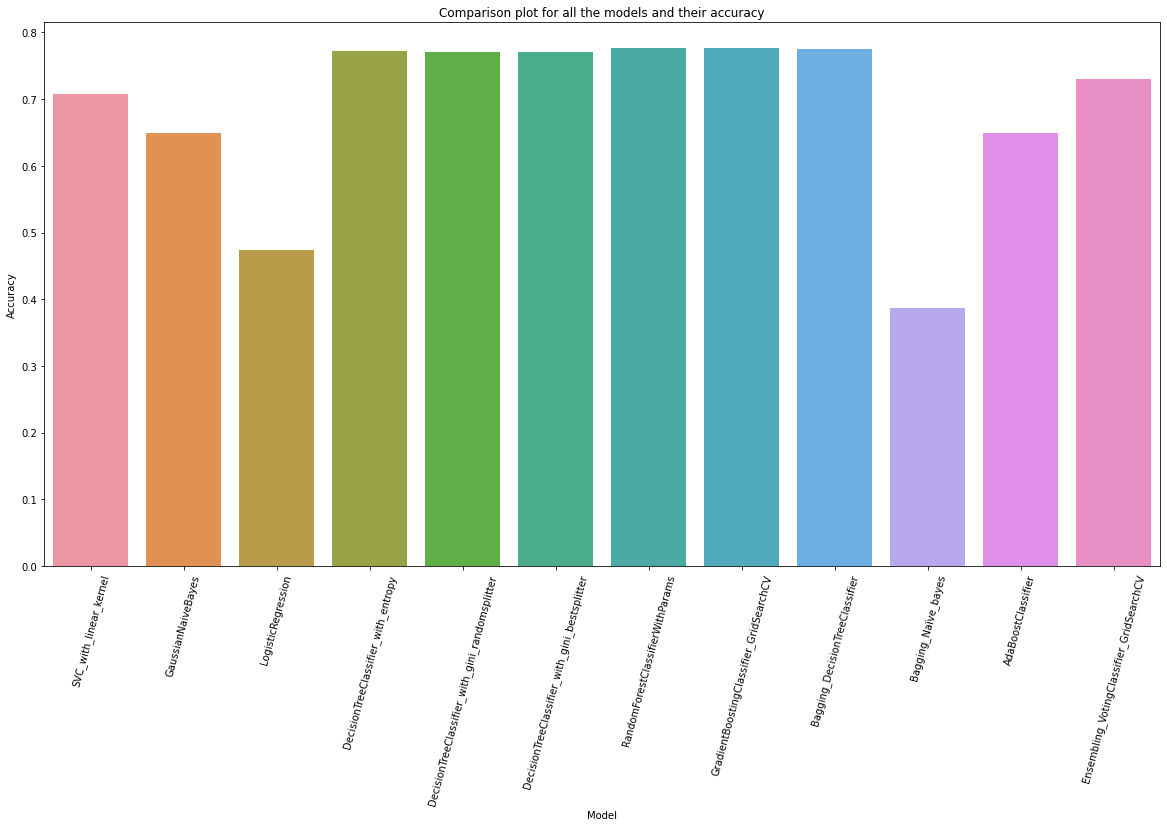

In [96]:
plt.figure(figsize=(20,10))
ax= sns.barplot(x = dfResults.Model,y = dfResults.Accuracy, data=dfResults)

ax.set_xticklabels(dfResults.Model,rotation = 75)
ax.set_title('Comparison plot for all the models and their accuracy')
plt.show()

From the above results we can see that RandomForestClassifierWithParams performed the best with accuracy 0.77 and execution time 722 seconds. We can use this model to predict the answer value selected by a student.

**Save the best Model with pickle**

In [104]:
import pickle
filename='AswerChosen.sav'
pickle.dump(RandomForestClassifier_grid_searchCV, open(filename, 'wb'))

**Load the saved mode to predict the sales price.**

In [105]:
TestData =  np.array([[11278,60776,19520086,1,1,4528,	13483,	1,	395,	18]])
TestData.reshape(1, -1)

array([[   11278,    60776, 19520086,        1,        1,     4528,
           13483,        1,      395,       18]])

In [106]:
loaded_model = pickle.load(open("/content/AswerChosen.sav", 'rb'))

y_predicted = loaded_model.predict(TestData)

print(y_predicted)

[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


**The predicted result is 1 which means that the answer value chosen by the student is 1.**